In [146]:
import pandas as pd
from sklearn import datasets  # import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import  accuracy_score , precision_score, confusion_matrix

In [147]:
datos=datasets.load_breast_cancer()
type(datos)

#saber los elementos de la fila 10,50,85
datos.target[[10, 50, 85]]
list(datos.target_names)

pd.value_counts(datos['target'])  # o =maligno, 1= benigno


1    357
0    212
dtype: int64

In [148]:
dataset=pd.DataFrame(data=datos.data,columns=datos.feature_names)
dataset['target']=datos.target
dataset['target']=dataset.target.replace(0,'MALIGNO')
dataset['target']=dataset.target.replace(1,'BENIGNO')
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,MALIGNO
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,MALIGNO
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,MALIGNO
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,MALIGNO
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,MALIGNO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,MALIGNO
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,MALIGNO
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,MALIGNO
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,MALIGNO


## Dataset visualization

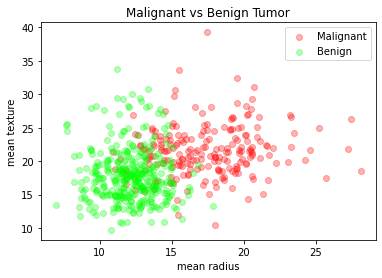

In [149]:
#DATASET VISUALIZATION
M = dataset[dataset.target == "MALIGNO"]
B = dataset[dataset.target == "BENIGNO"]
plt.title("Malignant vs Benign Tumor")
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(M['mean radius'], M['mean texture'], color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B['mean radius'], B['mean texture'], color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [150]:
#variables
X=dataset.drop('target',axis=1)
Y=dataset.target
dataset.columns.values[-1]

'target'

## Data de entrenamiento y data de prueba

In [151]:
#train and test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33)
x_train.shape , y_train.shape ,x_test.shape,y_test.shape

((381, 30), (381,), (188, 30), (188,))

## Creación de modelo

In [152]:
#modelo
model_tree=DecisionTreeClassifier(max_depth=4)#max_depth= nivel del arbol,criterion=gini default , menor es mejor,mejor class dist
model_tree.fit(x_train,y_train) #entreno


DecisionTreeClassifier(max_depth=4)

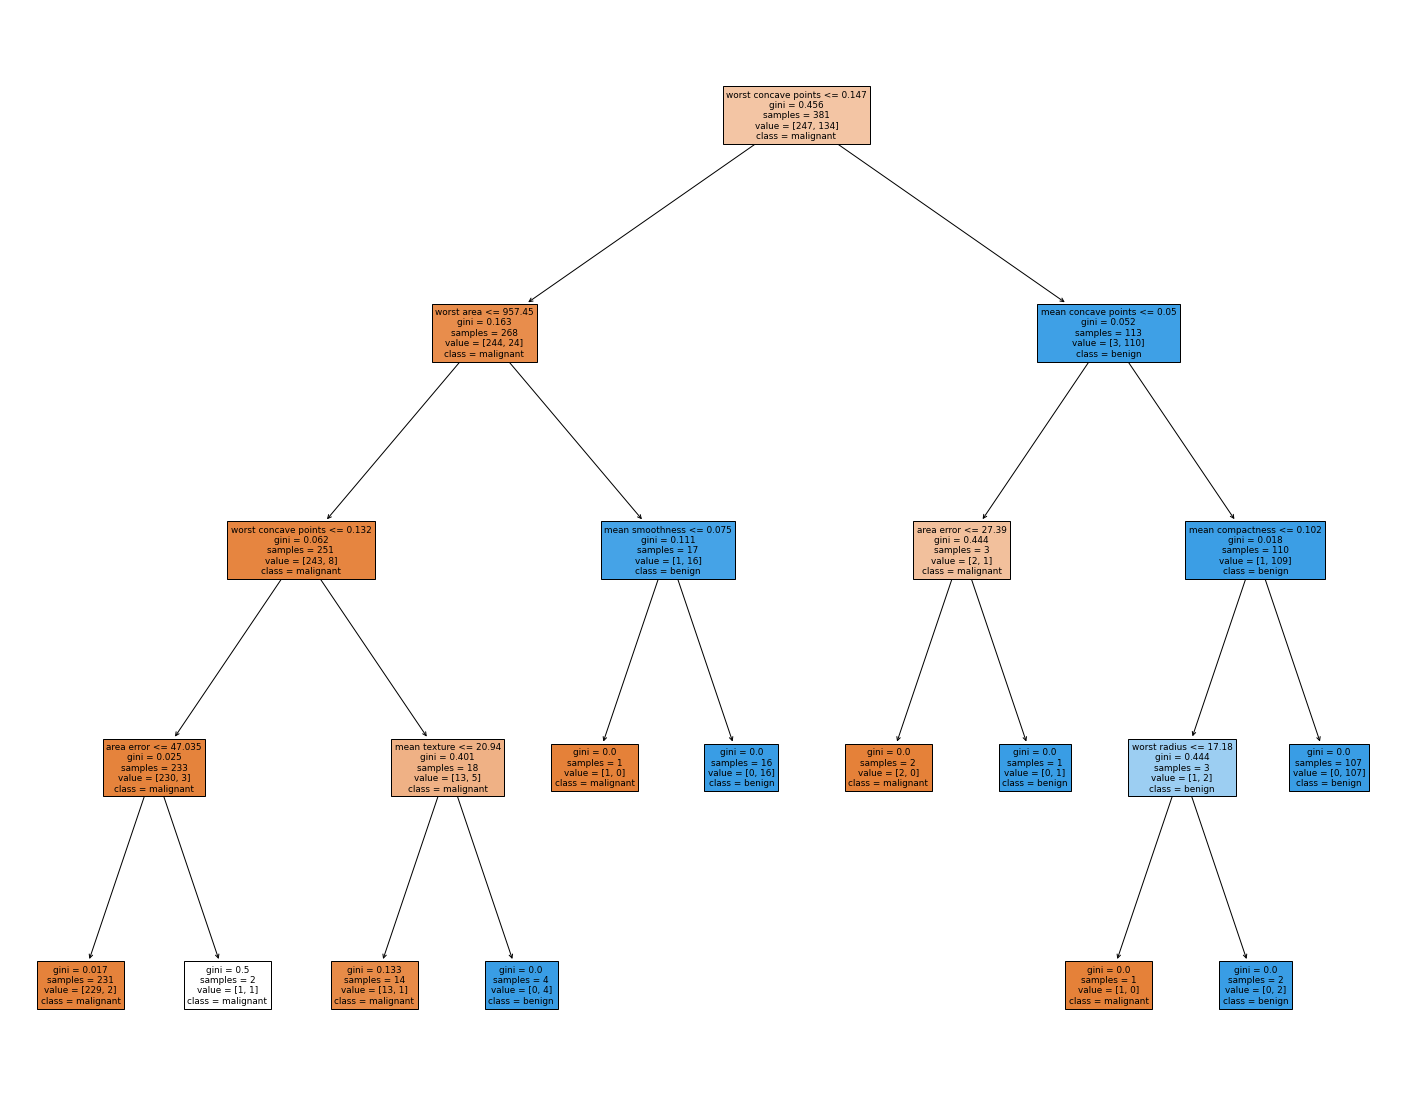

In [153]:
fig= plt.figure(figsize=(25,20))
tree.plot_tree(model_tree,feature_names=list(dataset.columns.values[:-1]), class_names=list(datos.target_names),filled=True)
fig.savefig("Tree Decision.png")
plt.show()
#

In [154]:
model_tree.get_params()
#samples :cantidad de muestras qe cumplen con las preguntas anteriores

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [155]:
predictions=model_tree.predict(x_test)  
predictions

array(['MALIGNO', 'BENIGNO', 'MALIGNO', 'BENIGNO', 'MALIGNO', 'BENIGNO',
       'BENIGNO', 'MALIGNO', 'BENIGNO', 'BENIGNO', 'BENIGNO', 'BENIGNO',
       'MALIGNO', 'MALIGNO', 'MALIGNO', 'MALIGNO', 'BENIGNO', 'MALIGNO',
       'BENIGNO', 'MALIGNO', 'MALIGNO', 'BENIGNO', 'BENIGNO', 'MALIGNO',
       'MALIGNO', 'BENIGNO', 'BENIGNO', 'MALIGNO', 'BENIGNO', 'BENIGNO',
       'MALIGNO', 'BENIGNO', 'BENIGNO', 'BENIGNO', 'MALIGNO', 'MALIGNO',
       'MALIGNO', 'BENIGNO', 'BENIGNO', 'BENIGNO', 'BENIGNO', 'BENIGNO',
       'MALIGNO', 'MALIGNO', 'BENIGNO', 'MALIGNO', 'BENIGNO', 'MALIGNO',
       'MALIGNO', 'BENIGNO', 'MALIGNO', 'BENIGNO', 'MALIGNO', 'MALIGNO',
       'BENIGNO', 'BENIGNO', 'MALIGNO', 'BENIGNO', 'MALIGNO', 'BENIGNO',
       'BENIGNO', 'BENIGNO', 'BENIGNO', 'BENIGNO', 'BENIGNO', 'BENIGNO',
       'BENIGNO', 'MALIGNO', 'BENIGNO', 'BENIGNO', 'MALIGNO', 'BENIGNO',
       'BENIGNO', 'MALIGNO', 'MALIGNO', 'BENIGNO', 'BENIGNO', 'BENIGNO',
       'BENIGNO', 'BENIGNO', 'BENIGNO', 'MALIGNO', 

In [156]:
y_test

47     MALIGNO
46     BENIGNO
4      MALIGNO
96     BENIGNO
81     BENIGNO
        ...   
447    BENIGNO
132    MALIGNO
86     MALIGNO
303    BENIGNO
167    MALIGNO
Name: target, Length: 188, dtype: object

## Accuracy of model

In [157]:
#y_true=y_test, y_pred=predicitionsY
accuracy_score(y_test,predictions)

0.9361702127659575

## matriz de confusión

In [158]:
confusion_matrix(y_test,predictions,labels=['MALIGNO','BENIGNO'])    #51, cuando la clase es 0 # , #9 instancias mal clasificadas

array([[ 71,   7],
       [  5, 105]], dtype=int64)

In [141]:
#la Exactitud es  la cantidad de predicciones positivas que fueron correctas.
#cuando las clase es 0  y se predice que es 0 =68 
#cuando las clase es 1 y se predice como 1= 109
#accuraccy=(VP+VN)/(VP+FP+FN+VN)

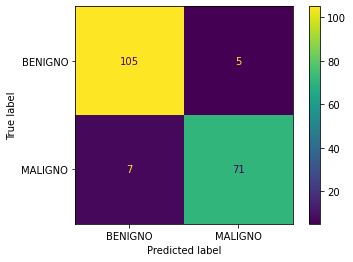

In [159]:
actual = y_test
predicted = predictions

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['BENIGNO', 'MALIGNO'])
#false  true
cm_display.plot()
plt.show()

In [160]:
features_names=X.columns
features_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

## Importancia de las variables

In [161]:
feature_importances=pd.DataFrame(model_tree.feature_importances_,index=features_names).sort_values(by=0 , ascending = False ,)
feature_importances

,0
worst concave points,0.758120
worst area,0.157735
mean texture,0.032142
mean concave points,0.015130
area error,0.013723
mean smoothness,0.011277
worst radius,0.007988
mean compactness,0.003885
mean radius,0.000000
worst perimeter,0.000000


<AxesSubplot:>

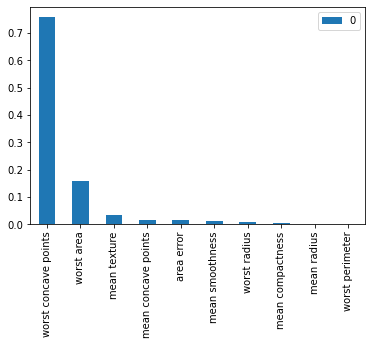

In [162]:
feature_importances.head(10).plot(kind='bar')